# BTC vs. GOLD

#### In the past decade, BTC has been steadily rising to prominence and penetrating the mainstream. While is it still widely considered too volatile to be considered a safe meadium for storing value, it is compared with Gold quite often. In this brief Capstone project, I will not delve into the factors that impact the return of BTC nor do I try to prove the correlation between the rate of return of the two assets. This project is merely exploratory and tries to answet the question:

#### What is the rate of return of BTC and Gold? In the following project, I describe my method for data acquirement, mining and visulaization. 

#### Relying on Yahoo! Finance data from the beginning of 2019, I use the Daily Close price of both assets. This year, 2019, has been notable for both assets. In terms of BTC, this year saw a recovery from a bear-ish run in 2018 -reaching a low of around \$3,000 USD- to a high of over \$13,000 USD per BTC in June of this Year. Similarily Gold price per ounce reached over $1,400 for the first time in more than half a decade. 

#### What is the rate of return of BTC and Gold? In the following project, I describe my method for data acquirement, mining and visualization. 

## Setting up the development environment and installing the pertinent sub packages.

#### In the first step, it was important is to install 'pandas- datareader', to create a dataframe from the stock price data from Yahoo! Finance

In [1]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


#### Next, to access data from Yahoo! Finance APIs, a work-around is needed, since the historical API is no longer useable. I found this workaround through a google search.

In [2]:
pip install yfinance --upgrade --no-cache-dir

Requirement already up-to-date: yfinance in c:\users\zalth\anaconda3\lib\site-packages (0.1.43)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pyspellchecker

Note: you may need to restart the kernel to use updated packages.


#### The following is a typical development environment, except fot the yfinance library. 

In [5]:
import numpy as np
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as fyf
import matplotlib as mpl
from pandas.plotting import scatter_matrix
from scipy import stats
from datetime import date
from datetime import datetime
from pandas import Timestamp
from statsmodels.graphics.gofplots import qqplot
%matplotlib inline

In [6]:
fyf.pdr_override()

In [7]:
import warnings
warnings.filterwarnings("ignore")

## Price of BTC in USD (Source = CryptoCompare)

#### After exploring the data for BTC and Gold stock prices on Yahoo! Finance, I decided to get data from the beginning of 2019, since it seemed most comprhensive and complete for both assets. Additionally, I was only interested in the changes in price and rate of return during this year.  

#### As table (btc2) below shows, the data consists of Open, High, Low, Close  and Adj Close Prices. For the purposes of this study, Close price is the most useful. While Volume data is interesting, it is not very important within the context of this study. 

#### In this data series, data is provided daily which presents many opportunities for analysis. 

In [8]:
btc1 = pdr.get_data_yahoo('BTCUSD=X', start = '2019-01-01')
btc1.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,3747.3899,3696.9397,3938.7493,3880.1501,3880.1501,17059830700
2019-01-02,3880.1501,3826.2893,3989.5906,3961.0095,3961.0095,21085460300
2019-01-03,3961.0095,3778.7595,3965.5208,3835.8604,3835.8604,17648807200
2019-01-04,3835.8604,3783.8801,3901.6501,3874.0603,3874.0603,17050761100
2019-01-07,4102.8501,4001.3494,4132.6206,4050.4001,4050.4001,20928936800


In [9]:
type(btc1['Close'])

pandas.core.series.Series

In [10]:
type(btc1)

pandas.core.frame.DataFrame

#### While BTC is traded on the weekends as well as on holidays, Gold stocks are traded during business days. Referring to a few pertinent comparative studies, I decided to remove weekends from the BTC Price data. 

In [11]:
btc2=btc1[btc1.index.dayofweek <5]
btc2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,3747.3899,3696.9397,3938.7493,3880.1501,3880.1501,17059830700
2019-01-02,3880.1501,3826.2893,3989.5906,3961.0095,3961.0095,21085460300
2019-01-03,3961.0095,3778.7595,3965.5208,3835.8604,3835.8604,17648807200
2019-01-04,3835.8604,3783.8801,3901.6501,3874.0603,3874.0603,17050761100
2019-01-07,4102.8501,4001.3494,4132.6206,4050.4001,4050.4001,20928936800


In [12]:
btc2.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-22,10586.7051,10072.0654,10676.5977,10325.8740,10325.8740,52444285200
2019-07-23,10325.8740,9820.6074,10328.4453,9854.1484,9854.1484,52943812400
2019-07-24,9854.1484,9535.7793,9920.5361,9772.1426,9772.1426,53161190900
2019-07-25,9917.8096,9930.5000,9890.6406,9899.0898,9899.0898,0
2019-07-26,9772.2305,10184.4297,9744.7002,9870.4004,9870.4004,0


####  The structure for the data of price for Gold per ounce in USD is the same as that of BTC above. '
Gold stock price in USD (delayed price)

In [13]:
gold2 = pdr.get_data_yahoo('GC=F', start = '2019-01-01')
gold2.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,1286.1,1292.4,1280.6,1288.0,1288.0,117161644
2019-01-03,1290.3,1297.3,1286.4,1296.8,1296.8,126026410
2019-01-04,1296.2,1298.1,1278.1,1286.2,1286.2,163584509
2019-01-06,1287.0,1288.3,1285.6,1285.7,1285.7,82778
2019-01-07,1290.2,1297.0,1287.3,1290.2,1290.2,115068369


In [14]:
gold2.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-21,1428.5,1429.4,1424.4,1426.5,1426.5,463885
2019-07-22,1427.7,1430.8,1424.0,1424.5,1424.5,143551490
2019-07-23,1418.2,1431.1,1414.6,1417.1,1417.1,201962709
2019-07-24,1421.1,1430.0,1418.7,1425.2,1425.2,160276898
2019-07-25,1422.4,1434.1,1411.1,1415.3,1415.3,219691366


#### Gold is traded on Sundays starting 10 PM GMT. I can notice this because in the last few rows Sunday 7.14.2019 is not included in the btc data set. So I decided to inspect the shape of each data set.

In [15]:
count_row = btc2.shape[0]
print (count_row)

149


In [16]:
count_row1 = gold2.shape[0]
print (count_row1)

171


#### I decide to remove Sundays from the gold data set as well.

In [17]:
gold3=gold2[gold2.index.dayofweek <5]
gold3.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,1286.1,1292.4,1280.6,1288.0,1288.0,117161644
2019-01-03,1290.3,1297.3,1286.4,1296.8,1296.8,126026410
2019-01-04,1296.2,1298.1,1278.1,1286.2,1286.2,163584509
2019-01-07,1290.2,1297.0,1287.3,1290.2,1290.2,115068369
2019-01-08,1283.9,1288.4,1280.2,1285.8,1285.8,120716675


In [18]:
gold3.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-19,1444.5,1445.3,1421.1,1426.5,1426.5,273685337
2019-07-22,1427.7,1430.8,1424.0,1424.5,1424.5,143551490
2019-07-23,1418.2,1431.1,1414.6,1417.1,1417.1,201962709
2019-07-24,1421.1,1430.0,1418.7,1425.2,1425.2,160276898
2019-07-25,1422.4,1434.1,1411.1,1415.3,1415.3,219691366


## Data Exploration & Preliminary Visualization 

### BTC Price

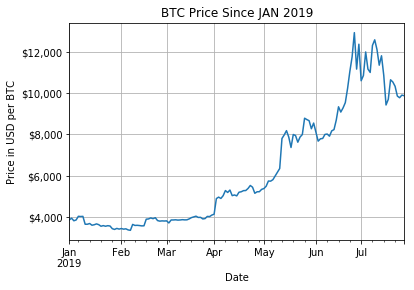

In [19]:
ax4 = btc2['Close'].plot(grid=True)
ax4.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
ax4.set_ylabel('Price in USD per BTC', position = (1000,0.5))
plt.title('BTC Price Since JAN 2019')
plt.show()

#### It is clear from the 'BTC Price since JAN 2019' that there has been a steady, almost exponential price increase per BTC. The price has increased threefold since January. There is also a noticeable recent reversal of the upward trend. 

In [20]:
btc2.describe()

,Open,High,Low,Close,Adj Close,Volume
count,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02
mean,6183.968905,6005.551838,6379.006134,6220.886877,6220.886877,3.741238e+10
std,2773.814259,2605.927047,2938.447906,2800.068759,2800.068759,3.244011e+10
min,3375.330300,3362.239500,3406.540000,3375.330300,3375.330300,0.000000e+00
25%,3874.890400,3804.979700,3916.290000,3874.890400,3874.890400,1.490058e+10
50%,5201.300800,5104.178700,5317.779800,5212.810100,5212.810100,2.314655e+10
75%,8193.141600,8027.209000,8352.251000,8183.828600,8183.828600,4.323353e+10
max,12913.273400,12117.304700,13826.764600,12913.273400,12913.273400,1.554955e+11


In [21]:
print ('Max Price is: $',btc2['Close'].max())
print ('Min Price is: $',btc2['Close'].min())

Max Price is: $ 12913.2734
Min Price is: $ 3375.3303


In [22]:
date_btcmax= btc2['Close'].idxmax() 
btc_max = date_btcmax.date()
print (btc_max)

date_btcmin=btc2['Close'].idxmin()
btc_min = date_btcmin.date()
print (btc_min)

2019-06-26
2019-02-07


In [23]:
btc2['Price_diff']=btc2['Close']-btc2['Close'].shift(1)
btc2.head()

,Open,High,Low,Close,Adj Close,Volume,Price_diff
Date,,,,,,,
2019-01-01,3747.3899,3696.9397,3938.7493,3880.1501,3880.1501,17059830700,NaN
2019-01-02,3880.1501,3826.2893,3989.5906,3961.0095,3961.0095,21085460300,80.8594
2019-01-03,3961.0095,3778.7595,3965.5208,3835.8604,3835.8604,17648807200,-125.1491
2019-01-04,3835.8604,3783.8801,3901.6501,3874.0603,3874.0603,17050761100,38.1999
2019-01-07,4102.8501,4001.3494,4132.6206,4050.4001,4050.4001,20928936800,176.3398


In [24]:
Threshold_10k = btc2[btc2['Close'] > 10000].index[0]
Threshold_10k

Timestamp('2019-06-21 00:00:00')

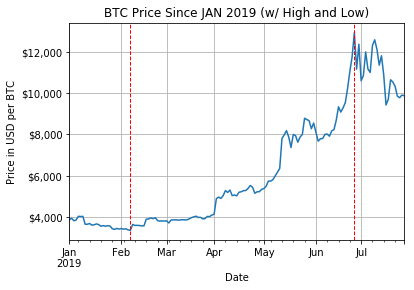

In [26]:
ax4 = btc2['Close'].plot(grid=True)
ax4.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
ax4.set_ylabel('Price in USD per BTC', position = (1000,0.5))
plt.title('BTC Price Since JAN 2019 (w/ High and Low)')
plt.axvline(x= btc_max, color = 'r', linestyle = 'dashed', linewidth=1 )
plt.axvline(x= btc_min, color = 'r', linestyle = 'dashed', linewidth=1 )
plt.show()

#### The lowest price in USD/ BTC was around \$3,300, in the beginning of February of 2019.The highest price in USD/BTC is close to 13k, which was reached near the end of June. 

In [27]:
print(btc2.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Price_diff'], dtype='object')


In [28]:
date_diffmin=btc2['Price_diff'].idxmin()
diff_min = date_diffmin.date()
print (diff_min)

2019-07-01


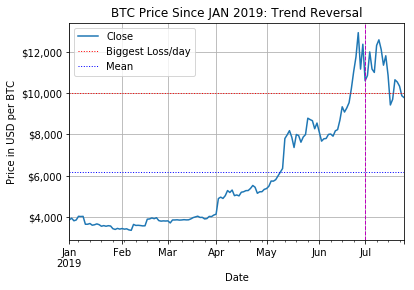

In [44]:
ax4 = btc2['Close'].plot(grid=True)
ax4.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
ax4.set_ylabel('Price in USD per BTC', position = (1000,0.5))
plt.title('BTC Price Since JAN 2019: Trend Reversal')
plt.axvline(x= diff_min , color= 'm', linestyle= 'dashed', linewidth=1)
plt.axhline(y = 10000, color= 'r', linestyle= 'dotted', linewidth=1, label = 'Biggest Loss/day')
plt.axhline(y=btc2.Close.mean(), color = 'b', linestyle = 'dotted', linewidth=1, label = 'Mean')
plt.legend()
plt.show()

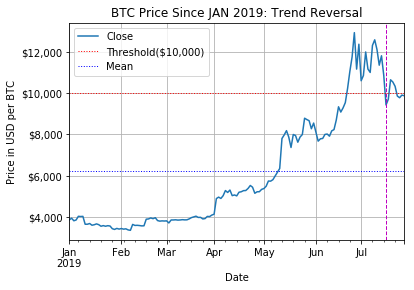

In [29]:
ax4 = btc2['Close'].plot(grid=True)
ax4.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
ax4.set_ylabel('Price in USD per BTC', position = (1000,0.5))
plt.title('BTC Price Since JAN 2019: Trend Reversal')
plt.axvline(x= '2019-07-16', color= 'm', linestyle= 'dashed', linewidth=1)
plt.axhline(y = 10000, color= 'r', linestyle= 'dotted', linewidth=1, label = 'Threshold($10,000)')
plt.axhline(y=btc2.Close.mean(), color = 'b', linestyle = 'dotted', linewidth=1, label = 'Mean')
plt.legend()
plt.show()

#### We see an oscillation of the price trend in the first two weeks of July, with the reversal of the upward trend mid-July, where the price fell starkly reaching below $10,000.

### Gold Price

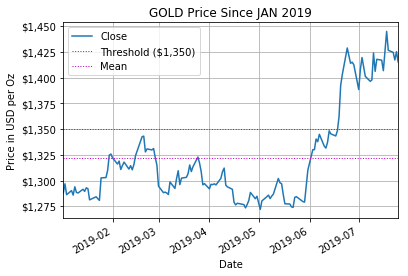

In [30]:
ax3 = gold3['Close'].plot(grid=True)
ax3.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
ax3.set_ylabel('Price in USD per Oz', position = (1000,0.5))
plt.title('GOLD Price Since JAN 2019')
plt.axhline(y= 1350, color ='r', linestyle='dotted', linewidth=1, label = 'Threshold ($1,350)')
plt.axhline(y=gold3.Close.mean(),color ='m', linestyle='dotted', linewidth=1, label = 'Mean')
plt.legend()
plt.show()

#### We can see in 'GOLD Price since JAN 2019' that the price of GOLD was oscillating below $1,350 for the first part of the year.

In [31]:
gold3.describe()

,Open,High,Low,Close,Adj Close,Volume
count,142.000000,142.000000,142.000000,142.000000,142.000000,1.420000e+02
mean,1311.440141,1327.938028,1305.430986,1322.243662,1322.243662,1.375924e+08
std,119.999365,48.452919,118.983015,46.908864,46.908864,5.047198e+07
min,0.000000,1275.900000,0.000000,1271.900000,1271.900000,3.762840e+07
25%,1287.925000,1292.875000,1281.075000,1288.050000,1288.050000,1.099841e+08
50%,1303.850000,1311.200000,1297.450000,1304.850000,1304.850000,1.272594e+08
75%,1333.050000,1343.350000,1326.950000,1336.250000,1336.250000,1.513497e+08
max,1444.500000,1454.400000,1424.000000,1444.900000,1444.900000,3.439746e+08


In [32]:
print ('Max Price is: $',gold3['Close'].max())
print ('Min Price is: $',gold3['Close'].min())

Max Price is: $ 1444.9
Min Price is: $ 1271.9


In [38]:
date_gldmax= gold3['Close'].idxmax() 
gld_max = date_gldmax.date()
print (gld_max)

date_gldmin=gold3['Close'].idxmin()
gld_min = date_gldmin.date()
print (gld_min)

2019-07-18
2019-05-02


In [33]:
date1_gld = gold3[gold3['Close']> 1350].index[0]
print (date1_gld)
type(date1_gld)

2019-06-19 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [34]:
date1_gld.to_pydatetime()

datetime.datetime(2019, 6, 19, 0, 0)

In [35]:
date2_gld = date1_gld.date()
date2_gld

datetime.date(2019, 6, 19)

In [36]:
date2_gld.strftime("%Y-%m-%d")

'2019-06-19'

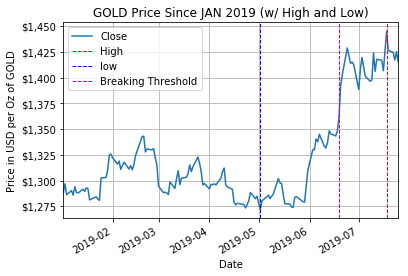

In [39]:
ax4 = gold3['Close'].plot(grid=True)
ax4.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
ax4.set_ylabel('Price in USD per Oz of GOLD', position = (1000,0.5))
plt.title('GOLD Price Since JAN 2019 (w/ High and Low)')
plt.axvline(x= gld_max, color = 'r', linestyle = 'dashed', linewidth=1 , label = 'High')
plt.axvline(x= gld_min , color = 'b', linestyle = 'dashed', linewidth=1, label = 'low' )
plt.axvline(x=date2_gld, color = 'm', linestyle = 'dashed', linewidth=1, label = 'Breaking Threshold')
plt.legend()
plt.show()

#### The lowest price in USD/ Gold was around  \$1,270, in the beginning of May of 2019.The highest price in USD/BTC is above \$14k, which was reached recently in the second half of July. The stark increase above \$1,350 started in the second half of June.

## Comparative Price Analysis 

#### To compare prices from both, I plotted the data on the same graph.

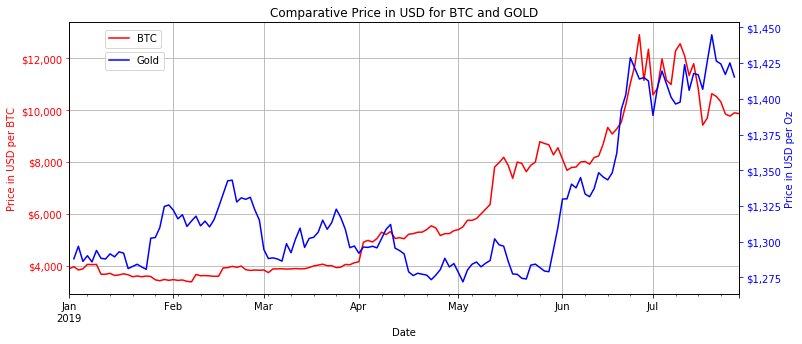

In [40]:
plt.figure(figsize=(12,5))
plt.xlabel('Price in USD')

ax1 = btc2.Close.plot(color='red', grid=True, label='BTC')
ax2 = gold3.Close.plot(color='blue', grid=True, secondary_y=True, label='Gold')


ax1.legend(bbox_to_anchor=(0.05, 0.9), loc=3, borderaxespad=0.2)
ax2.legend(bbox_to_anchor=(0.05, 0.9), loc=2, borderaxespad=0.2)

ax1.set_ylabel('Price in USD per BTC', position = (1000,0.5))
ax1.tick_params(axis='y', colors='red')
ax1.yaxis.label.set_color('red')

#can't move y-label horizontally, ask mentor
ax2.set_ylabel('Price in USD per Oz', position = (10000,0.5))
ax2.tick_params(axis='y', colors='blue')
ax2.yaxis.label.set_color('blue')

ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))

plt.title('Comparative Price in USD for BTC and GOLD')

plt.show()

I was also curious in comparing the trading volume of both

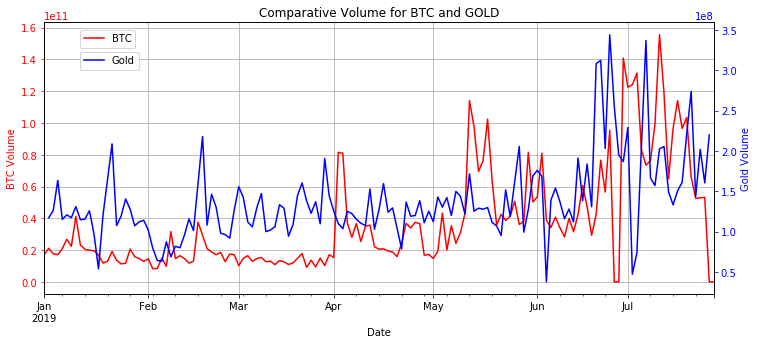

In [41]:
plt.figure(figsize=(12,5))
plt.xlabel('Price in USD')

ax1 = btc2.Volume.plot(color='red', grid=True, label='BTC')
ax2 = gold3.Volume.plot(color='blue', grid=True, secondary_y=True, label='Gold')

ax1.legend(bbox_to_anchor=(0.05, 0.9), loc=3, borderaxespad=0.2)
ax2.legend(bbox_to_anchor=(0.05, 0.9), loc=2, borderaxespad=0.2)

ax1.set_ylabel('BTC Volume', position = (1000,0.5))
ax1.tick_params(axis='y', colors='red')
ax1.yaxis.label.set_color('red')

#can't move y-label horizontally, ask mentor
ax2.set_ylabel('Gold Volume', position = (10000,0.5))
ax2.tick_params(axis='y', colors='blue')
ax2.yaxis.label.set_color('blue')

plt.title('Comparative Volume for BTC and GOLD')

plt.show()

#### The trend in volumne is rather standard for both assets, rising prices are accompanied by increased trading volumes. 

## Price Volatility

#### BTC price if known to be exponentially more volatile than Gold. A quick measure of volatility is looking at variance through standard deviation. This bascially tells how how far the price deviates from the mean.

In [44]:
btc_p= np.std(btc2['Close'])
gold_p=np.std(gold3['Close'])
print ('BTC Price Volatility: $', int (btc_p))
print ('Gold Price Volatility: $', int (gold_p))

BTC Price Volatility: $ 2790
Gold Price Volatility: $ 46


ARCH Model

In [267]:
##apply in time series section 

GARCH Model

In [268]:
##apply in time series section

## Rate of Return

r=pt/p0−1=pt−p0/p0

In [45]:
btc2['Daily_Return']=btc2['Close']/btc2['Close'].shift(1)-1
btc2['Daily_Return_%']=btc2['Close'].pct_change(1)
btc2['Cumulative Return'] = np.cumsum(btc2['Daily_Return'])
btc2['Cumulative Return Compounded'] = (1+btc2['Daily_Return']).cumprod()
btc2.head()

,Open,High,Low,Close,Adj Close,Volume,Price_diff,Daily_Return,Daily_Return_%,Cumulative Return,Cumulative Return Compounded
Date,,,,,,,,,,,
2019-01-01,3747.3899,3696.9397,3938.7493,3880.1501,3880.1501,17059830700,NaN,NaN,NaN,NaN,NaN
2019-01-02,3880.1501,3826.2893,3989.5906,3961.0095,3961.0095,21085460300,80.8594,0.020839,0.020839,0.020839,1.020839
2019-01-03,3961.0095,3778.7595,3965.5208,3835.8604,3835.8604,17648807200,-125.1491,-0.031595,-0.031595,-0.010756,0.988586
2019-01-04,3835.8604,3783.8801,3901.6501,3874.0603,3874.0603,17050761100,38.1999,0.009959,0.009959,-0.000797,0.998431
2019-01-07,4102.8501,4001.3494,4132.6206,4050.4001,4050.4001,20928936800,176.3398,0.045518,0.045518,0.044721,1.043877


In [46]:
btc2.tail()

,Open,High,Low,Close,Adj Close,Volume,Price_diff,Daily_Return,Daily_Return_%,Cumulative Return,Cumulative Return Compounded
Date,,,,,,,,,,,
2019-07-22,10586.7051,10072.0654,10676.5977,10325.8740,10325.8740,52444285200,-207.0615,-0.019658,-0.019658,1.142808,2.661205
2019-07-23,10325.8740,9820.6074,10328.4453,9854.1484,9854.1484,52943812400,-471.7256,-0.045684,-0.045684,1.097124,2.539631
2019-07-24,9854.1484,9535.7793,9920.5361,9772.1426,9772.1426,53161190900,-82.0058,-0.008322,-0.008322,1.088802,2.518496
2019-07-25,9917.8096,9930.5000,9890.6406,9899.0898,9899.0898,0,126.9472,0.012991,0.012991,1.101793,2.551213
2019-07-26,9772.2305,10184.4297,9744.7002,9870.4004,9870.4004,0,-28.6894,-0.002898,-0.002898,1.098895,2.543819


In [47]:
btc2.drop(['Open', 'High','Low','Adj Close'],axis=1, inplace = True)
btc2.head()

,Close,Volume,Price_diff,Daily_Return,Daily_Return_%,Cumulative Return,Cumulative Return Compounded
Date,,,,,,,
2019-01-01,3880.1501,17059830700,NaN,NaN,NaN,NaN,NaN
2019-01-02,3961.0095,21085460300,80.8594,0.020839,0.020839,0.020839,1.020839
2019-01-03,3835.8604,17648807200,-125.1491,-0.031595,-0.031595,-0.010756,0.988586
2019-01-04,3874.0603,17050761100,38.1999,0.009959,0.009959,-0.000797,0.998431
2019-01-07,4050.4001,20928936800,176.3398,0.045518,0.045518,0.044721,1.043877


For predictive modelling, data is normalized using log 


In [48]:
btc2['Log Daily Return'] = np.log(btc2['Close']/btc2['Close'].shift(1))
btc2.head()

,Close,Volume,Price_diff,Daily_Return,Daily_Return_%,Cumulative Return,Cumulative Return Compounded,Log Daily Return
Date,,,,,,,,
2019-01-01,3880.1501,17059830700,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,3961.0095,21085460300,80.8594,0.020839,0.020839,0.020839,1.020839,0.020625
2019-01-03,3835.8604,17648807200,-125.1491,-0.031595,-0.031595,-0.010756,0.988586,-0.032105
2019-01-04,3874.0603,17050761100,38.1999,0.009959,0.009959,-0.000797,0.998431,0.009909
2019-01-07,4050.4001,20928936800,176.3398,0.045518,0.045518,0.044721,1.043877,0.044513


In [49]:
gold3['Daily_Return']=gold3['Close']/gold3['Close'].shift(1)-1
gold3['Daily_Return_%']=gold3['Close'].pct_change(1)
gold3['Cumulative Return'] = np.cumsum(gold3['Daily_Return'])
gold3['Cumulative Return Compounded'] = (1+gold3['Daily_Return']).cumprod()
gold3.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,Daily_Return_%,Cumulative Return,Cumulative Return Compounded
Date,,,,,,,,,,
2019-01-02,1286.1,1292.4,1280.6,1288.0,1288.0,117161644,NaN,NaN,NaN,NaN
2019-01-03,1290.3,1297.3,1286.4,1296.8,1296.8,126026410,0.006832,0.006832,0.006832,1.006832
2019-01-04,1296.2,1298.1,1278.1,1286.2,1286.2,163584509,-0.008174,-0.008174,-0.001342,0.998602
2019-01-07,1290.2,1297.0,1287.3,1290.2,1290.2,115068369,0.003110,0.003110,0.001768,1.001708
2019-01-08,1283.9,1288.4,1280.2,1285.8,1285.8,120716675,-0.003410,-0.003410,-0.001642,0.998292


In [50]:
gold3.tail()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,Daily_Return_%,Cumulative Return,Cumulative Return Compounded
Date,,,,,,,,,,
2019-07-19,1444.5,1445.3,1421.1,1426.5,1426.5,273685337,-0.012734,-0.012734,0.105563,1.107531
2019-07-22,1427.7,1430.8,1424.0,1424.5,1424.5,143551490,-0.001402,-0.001402,0.104161,1.105978
2019-07-23,1418.2,1431.1,1414.6,1417.1,1417.1,201962709,-0.005195,-0.005195,0.098966,1.100233
2019-07-24,1421.1,1430.0,1418.7,1425.2,1425.2,160276898,0.005716,0.005716,0.104682,1.106522
2019-07-25,1422.4,1434.1,1411.1,1415.3,1415.3,219691366,-0.006946,-0.006946,0.097736,1.098835


In [51]:
gold3.describe()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,Daily_Return_%,Cumulative Return,Cumulative Return Compounded
count,142.000000,142.000000,142.000000,142.000000,142.000000,1.420000e+02,141.000000,141.000000,141.000000,141.000000
mean,1311.440141,1327.938028,1305.430986,1322.243662,1322.243662,1.375924e+08,0.000693,0.000693,0.027149,1.026775
std,119.999365,48.452919,118.983015,46.908864,46.908864,5.047198e+07,0.007032,0.007032,0.035544,0.036480
min,0.000000,1275.900000,0.000000,1271.900000,1271.900000,3.762840e+07,-0.017062,-0.017062,-0.011221,0.987500
25%,1287.925000,1292.875000,1281.075000,1288.050000,1288.050000,1.099841e+08,-0.003737,-0.003737,0.000721,1.000155
50%,1303.850000,1311.200000,1297.450000,1304.850000,1304.850000,1.272594e+08,0.000307,0.000307,0.015307,1.014441
75%,1333.050000,1343.350000,1326.950000,1336.250000,1336.250000,1.513497e+08,0.004861,0.004861,0.039400,1.038199
max,1444.500000,1454.400000,1424.000000,1444.900000,1444.900000,3.439746e+08,0.022467,0.022467,0.118298,1.121817


In [52]:
btc2.describe()

,Close,Volume,Price_diff,Daily_Return,Daily_Return_%,Cumulative Return,Cumulative Return Compounded,Log Daily Return
count,149.000000,1.490000e+02,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,6220.886877,3.741238e+10,40.474664,0.007425,0.007425,0.433550,1.607335,0.006309
std,2800.068759,3.244011e+10,423.183987,0.047500,0.047500,0.471542,0.722367,0.046713
min,3375.330300,0.000000e+00,-1763.185600,-0.142710,-0.142710,-0.131045,0.869897,-0.153979
25%,3874.890400,1.490058e+10,-50.962875,-0.009633,-0.009633,0.016053,0.998599,-0.009680
50%,5212.810100,2.314655e+10,16.245600,0.003447,0.003447,0.334981,1.346198,0.003441
75%,8183.828600,4.323353e+10,136.126800,0.022333,0.022333,0.830602,2.112486,0.022088
max,12913.273400,1.554955e+11,1448.069300,0.227745,0.227745,1.317715,3.328035,0.205179


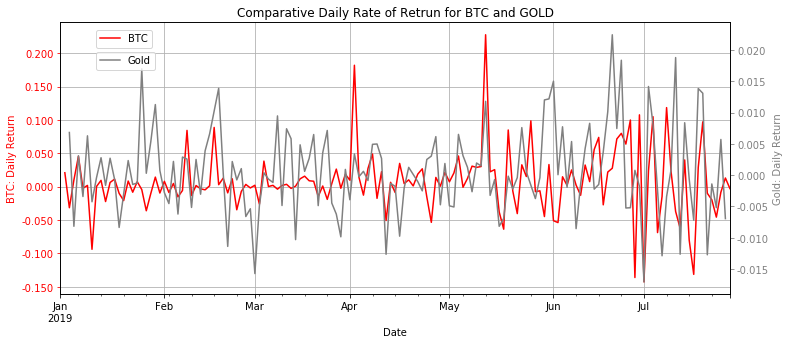

In [53]:
plt.figure(figsize=(12,5))
plt.xlabel('Price in USD')

ax1 = btc2.Daily_Return.plot(color='red', grid=True, label='BTC')
ax2 = gold3.Daily_Return.plot(color='grey', grid=True, secondary_y=True, label='Gold')


ax1.legend(bbox_to_anchor=(0.05, 0.9), loc=3, borderaxespad=0.2)
ax2.legend(bbox_to_anchor=(0.05, 0.9), loc=2, borderaxespad=0.2)

ax1.set_ylabel('BTC: Daily Return', position = (1000,0.5))
ax1.tick_params(axis='y', colors='red')
ax1.yaxis.label.set_color('red')

#can't move y-label horizontally, ask mentor
ax2.set_ylabel('Gold: Daily Return', position = (10000,0.5))
ax2.tick_params(axis='y', colors='grey')
ax2.yaxis.label.set_color('grey')

ax1.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.3f'))
ax2.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.3f'))

plt.title('Comparative Daily Rate of Retrun for BTC and GOLD')

plt.show() 

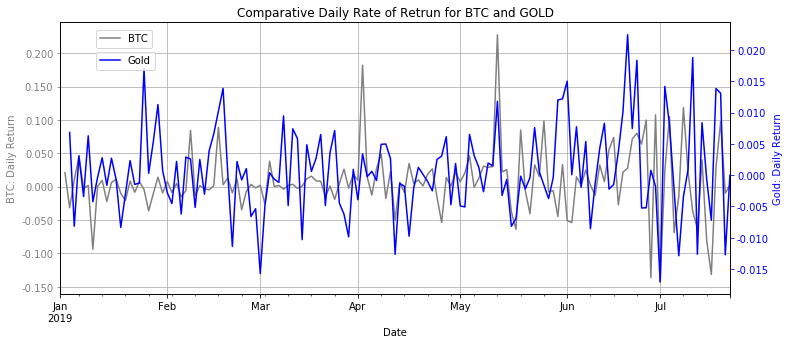

In [196]:
plt.figure(figsize=(12,5))
plt.xlabel('Price in USD')

ax1 = btc2.Daily_Return.plot(color='grey', grid=True, label='BTC')
ax2 = gold3.Daily_Return.plot(color='blue', grid=True, secondary_y=True, label='Gold')


ax1.legend(bbox_to_anchor=(0.05, 0.9), loc=3, borderaxespad=0.2)
ax2.legend(bbox_to_anchor=(0.05, 0.9), loc=2, borderaxespad=0.2)

ax1.set_ylabel('BTC: Daily Return', position = (1000,0.5))
ax1.tick_params(axis='y', colors='grey')
ax1.yaxis.label.set_color('grey')

#can't move y-label horizontally, ask mentor
ax2.set_ylabel('Gold: Daily Return', position = (10000,0.5))
ax2.tick_params(axis='y', colors='blue')
ax2.yaxis.label.set_color('blue')

ax1.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.3f'))
ax2.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.3f'))

plt.title('Comparative Daily Rate of Retrun for BTC and GOLD')

plt.show()

#### As shown in the two figures above, the Daily RoR of Gold is overall more steady than that of BTC. This speaks to the volatile nature of BTC. 

In [55]:
btc2['cumulative_return'] = np.exp(np.log1p(btc2['Daily_Return']).cumsum())-1
btc2.tail()

,Close,Volume,Price_diff,Daily_Return,Daily_Return_%,Cumulative Return,Cumulative Return Compounded,Log Daily Return,cumulative_return
Date,,,,,,,,,
2019-07-22,10325.8740,52444285200,-207.0615,-0.019658,-0.019658,1.142808,2.661205,-0.019854,1.661205
2019-07-23,9854.1484,52943812400,-471.7256,-0.045684,-0.045684,1.097124,2.539631,-0.046760,1.539631
2019-07-24,9772.1426,53161190900,-82.0058,-0.008322,-0.008322,1.088802,2.518496,-0.008357,1.518496
2019-07-25,9899.0898,0,126.9472,0.012991,0.012991,1.101793,2.551213,0.012907,1.551213
2019-07-26,9870.4004,0,-28.6894,-0.002898,-0.002898,1.098895,2.543819,-0.002902,1.543819


In [56]:
SP500 = pdr.get_data_yahoo('^GSPC', start = '2019-01-01')
SP500.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,2476.96,2519.49,2467.47,2510.03,2510.03,3733160000
2019-01-03,2491.92,2493.14,2443.96,2447.89,2447.89,3822860000
2019-01-04,2474.33,2538.07,2474.33,2531.94,2531.94,4213410000
2019-01-07,2535.61,2566.16,2524.56,2549.69,2549.69,4104710000
2019-01-08,2568.11,2579.82,2547.56,2574.41,2574.41,4083030000


In [57]:
SP500['Daily_Return1']=SP500['Close']/SP500['Close'].shift(1)-1
SP500.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return1
Date,,,,,,,
2019-01-02,2476.96,2519.49,2467.47,2510.03,2510.03,3733160000,NaN
2019-01-03,2491.92,2493.14,2443.96,2447.89,2447.89,3822860000,-0.024757
2019-01-04,2474.33,2538.07,2474.33,2531.94,2531.94,4213410000,0.034336
2019-01-07,2535.61,2566.16,2524.56,2549.69,2549.69,4104710000,0.007010
2019-01-08,2568.11,2579.82,2547.56,2574.41,2574.41,4083030000,0.009695


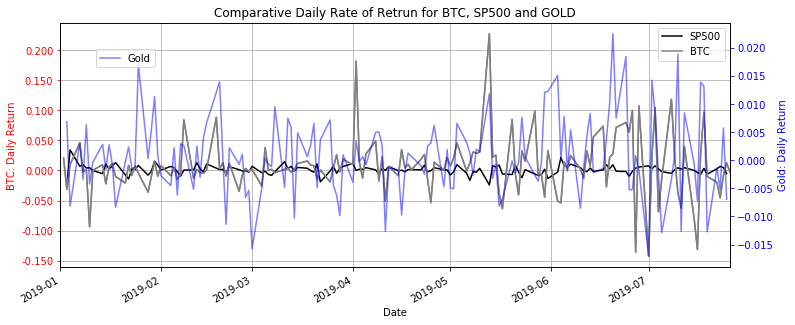

In [58]:
plt.figure(figsize=(12,5))
plt.xlabel('Price in USD')

ax3 = SP500.Daily_Return1.plot(color='black', grid=True, label='SP500')
ax2 = gold3.Daily_Return.plot(color='blue', grid=True, secondary_y=True, label='Gold', alpha = 0.5)
ax1 = btc2.Daily_Return.plot(color='grey', grid=True, label='BTC')


ax3.legend(bbox_to_anchor=(0.05, 0.9), loc=3, borderaxespad=0.2)
ax2.legend(bbox_to_anchor=(0.05, 0.9), loc=2, borderaxespad=0.2)
ax1 = btc2.Daily_Return.plot(color='grey', grid=True, label='BTC')

ax3.set_ylabel('SP500: Daily RoR', position = (1000,0.5))
ax3.tick_params(axis='y', colors='yellow')
ax3.yaxis.label.set_color('yellow')

#can't move y-label horizontally, ask mentor
ax2.set_ylabel('Gold: Daily Return', position = (10000,0.5))
ax2.tick_params(axis='y', colors='blue')
ax2.yaxis.label.set_color('blue')

ax1.set_ylabel('BTC: Daily Return', position = (10000,0.5))
ax1.tick_params(axis='y', colors='red')
ax1.yaxis.label.set_color('red')

ax3.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.3f'))
ax3.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.3f'))
ax3.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.3f'))

plt.title('Comparative Daily Rate of Retrun for BTC, SP500 and GOLD')

plt.show()

## Daily Rate of Return : Distribution

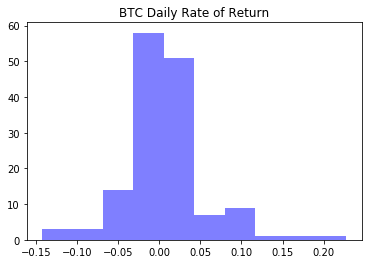

In [59]:
plt.hist(btc2['Daily_Return'], bins = 10, color = 'b', alpha = 0.5)
plt.title('BTC Daily Rate of Return')
plt.show()

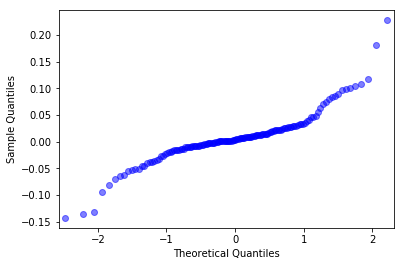

In [60]:
qqplot(btc2['Daily_Return'], color = 'b', alpha = 0.5)
plt.show()

#### It is evident that the Daily Return Data for BTC is not normally distributed. This is clear from the shape of the histogram and the QQ Plot test, where the scatter is skewed from the 45 degree line.

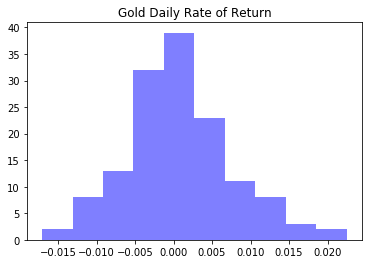

In [61]:
plt.hist(gold3['Daily_Return'], bins=10, color = 'b', alpha = 0.5)
plt.title('Gold Daily Rate of Return')
plt.show()

In [62]:
stats.shapiro(gold3['Daily_Return'])

(nan, 1.0)

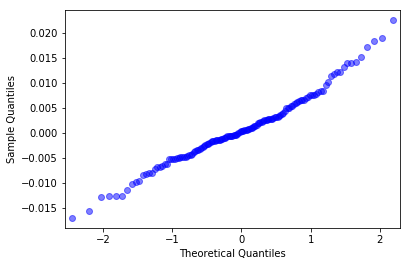

In [63]:
qqplot(gold3['Daily_Return'], color = 'b', alpha = 0.5)
plt.show()

#### The Daily Return Data for GOLD is normally distributed, due to the shape of the histogram as well as the QQ Plot. It seems like it couldbe slightly skewed, but not enough evidence that the data is not normally distributed. 

### Variance Stabalizing Transformation

#### Since the BTC Daily Return data is not normally distributed, we can't compare the two data sets without using variance stabilizing transformations (log transforming,etc). 

In [64]:
btc2['Daily_Return_Log'] = np.log1p(btc2['Daily_Return'])
btc2.tail()

,Close,Volume,Price_diff,Daily_Return,Daily_Return_%,Cumulative Return,Cumulative Return Compounded,Log Daily Return,cumulative_return,Daily_Return_Log
Date,,,,,,,,,,
2019-07-22,10325.8740,52444285200,-207.0615,-0.019658,-0.019658,1.142808,2.661205,-0.019854,1.661205,-0.019854
2019-07-23,9854.1484,52943812400,-471.7256,-0.045684,-0.045684,1.097124,2.539631,-0.046760,1.539631,-0.046760
2019-07-24,9772.1426,53161190900,-82.0058,-0.008322,-0.008322,1.088802,2.518496,-0.008357,1.518496,-0.008357
2019-07-25,9899.0898,0,126.9472,0.012991,0.012991,1.101793,2.551213,0.012907,1.551213,0.012907
2019-07-26,9870.4004,0,-28.6894,-0.002898,-0.002898,1.098895,2.543819,-0.002902,1.543819,-0.002902


In [65]:
gold3['Daily_Return_Log'] = np.log1p(gold3['Daily_Return'])
gold3.tail()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,Daily_Return_%,Cumulative Return,Cumulative Return Compounded,Daily_Return_Log
Date,,,,,,,,,,,
2019-07-19,1444.5,1445.3,1421.1,1426.5,1426.5,273685337,-0.012734,-0.012734,0.105563,1.107531,-0.012816
2019-07-22,1427.7,1430.8,1424.0,1424.5,1424.5,143551490,-0.001402,-0.001402,0.104161,1.105978,-0.001403
2019-07-23,1418.2,1431.1,1414.6,1417.1,1417.1,201962709,-0.005195,-0.005195,0.098966,1.100233,-0.005208
2019-07-24,1421.1,1430.0,1418.7,1425.2,1425.2,160276898,0.005716,0.005716,0.104682,1.106522,0.005700
2019-07-25,1422.4,1434.1,1411.1,1415.3,1415.3,219691366,-0.006946,-0.006946,0.097736,1.098835,-0.006971


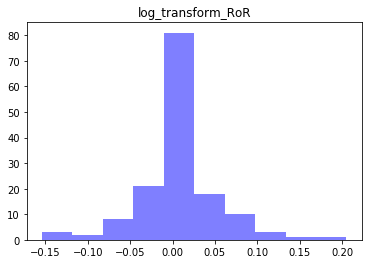

In [66]:
plt.hist(btc2['Daily_Return_Log'], bins = 10, color = 'b', alpha = 0.5)
plt.title('log_transform_RoR')
plt.show()

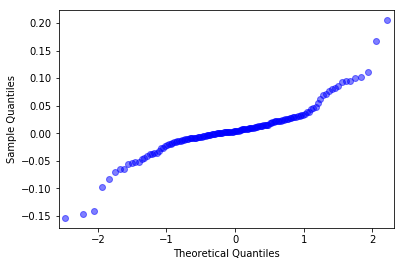

In [67]:
qqplot(btc2['Daily_Return_Log'], color = 'b', alpha = 0.5)
plt.show()

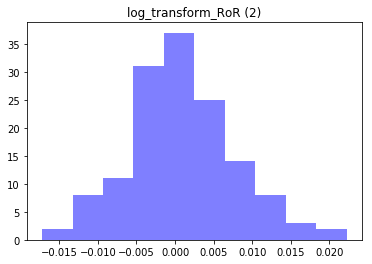

In [69]:
gold3['Daily_Return_Log'] = np.log1p(gold3['Daily_Return'])
plt.hist(gold3['Daily_Return_Log'], bins=10, color = 'b', alpha = 0.5)
plt.title('log_transform_RoR (2)')
plt.show()

In [205]:
##Return the natural logarithm of 1+x (base e). The result is calculated in a way which is accurate for x near zero.

In [70]:
btc2['Daily_Return_Log2'] = np.log(btc2['Daily_Return'])
btc2.tail()

,Close,Volume,Price_diff,Daily_Return,Daily_Return_%,Cumulative Return,Cumulative Return Compounded,Log Daily Return,cumulative_return,Daily_Return_Log,Daily_Return_Log2
Date,,,,,,,,,,,
2019-07-22,10325.8740,52444285200,-207.0615,-0.019658,-0.019658,1.142808,2.661205,-0.019854,1.661205,-0.019854,NaN
2019-07-23,9854.1484,52943812400,-471.7256,-0.045684,-0.045684,1.097124,2.539631,-0.046760,1.539631,-0.046760,NaN
2019-07-24,9772.1426,53161190900,-82.0058,-0.008322,-0.008322,1.088802,2.518496,-0.008357,1.518496,-0.008357,NaN
2019-07-25,9899.0898,0,126.9472,0.012991,0.012991,1.101793,2.551213,0.012907,1.551213,0.012907,-4.34352
2019-07-26,9870.4004,0,-28.6894,-0.002898,-0.002898,1.098895,2.543819,-0.002902,1.543819,-0.002902,NaN


In [71]:
btc2['DR']=np.log10(btc2['Daily_Return'])
btc2.tail()

,Close,Volume,Price_diff,Daily_Return,Daily_Return_%,Cumulative Return,Cumulative Return Compounded,Log Daily Return,cumulative_return,Daily_Return_Log,Daily_Return_Log2,DR
Date,,,,,,,,,,,,
2019-07-22,10325.8740,52444285200,-207.0615,-0.019658,-0.019658,1.142808,2.661205,-0.019854,1.661205,-0.019854,NaN,NaN
2019-07-23,9854.1484,52943812400,-471.7256,-0.045684,-0.045684,1.097124,2.539631,-0.046760,1.539631,-0.046760,NaN,NaN
2019-07-24,9772.1426,53161190900,-82.0058,-0.008322,-0.008322,1.088802,2.518496,-0.008357,1.518496,-0.008357,NaN,NaN
2019-07-25,9899.0898,0,126.9472,0.012991,0.012991,1.101793,2.551213,0.012907,1.551213,0.012907,-4.34352,-1.886367
2019-07-26,9870.4004,0,-28.6894,-0.002898,-0.002898,1.098895,2.543819,-0.002902,1.543819,-0.002902,NaN,NaN


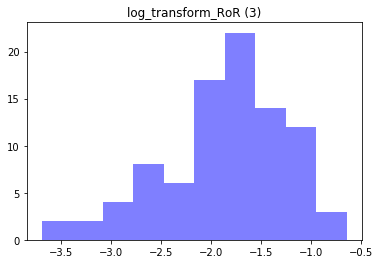

In [72]:
plt.hist(btc2['DR'], bins = 10, color = 'b', alpha = 0.5)
plt.title('log10_RoR')
plt.title('log_transform_RoR (3)')
plt.show()

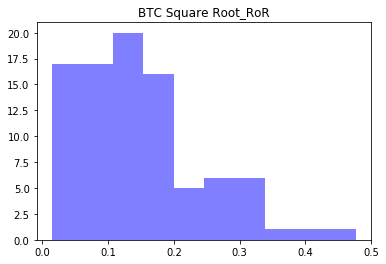

In [73]:
btc2['SQRT']=np.sqrt(btc2['Daily_Return'])
plt.hist(btc2['SQRT'], bins = 10, color = 'b', alpha = 0.5)
plt.title('BTC Square Root_RoR')
plt.show()

#### Typically the rate of return is normally distrubited. This is evident from the GOLD data. Given that BTC is not a traditional asset, that is highly volatile and largely speculative, its data does not seem to be normally distributed. 